expectation value:  10
expected damage output between: 8 and 14
2 --> 99.91 %
4 --> 98.85 %
6 --> 94.98 %
8 --> 85.54 %
10 --> 68.42 %
12 --> 45.75 %
14 --> 24.81 %
16 --> 10.55 %
18 --> 3.2 %
20 --> 0.68 %
22 --> 0.07 %
24 --> 0.02 %


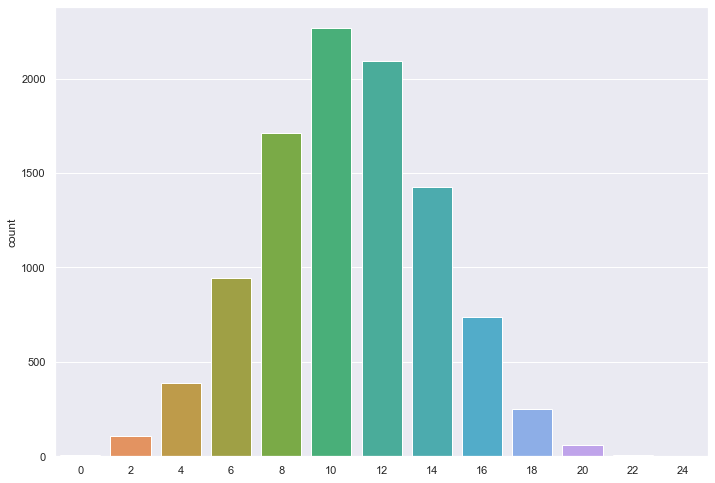

In [30]:
import random
import seaborn as sns

# ws = int(input('What is the hit roll for your attacks?'))
# S = int(input('What is the strength of your weapon?'))
# ap = int(input("What is your weapon's armor penetration?"))
# damage = int(input('What is the damage of your weapon?'))
# T = int(input('What is the toughness of your target?'))
# save =int(input("What is your target's save throw?"))
# attacks = int(input('how many attacks do you have?'))

# attacker characteristics
ws = 3
S = 8
ap = 3
damage = 2
attacks = 12

# defender characteristics
T = 7
save = 3
invulnerable_save = 7

# are there rerolls or modifiers in play
reroll_1s_hit = False
reroll_hit = False
reroll_1s_wound = False
reroll_wound = False
plus_1_to_wound = False

# set variables
n = 1000
spread = []

#define a roll
def roll():
    return random.randint(1,6)

#determine the wound roll
wound = 5
if S >= 2*T:
    wound = 2
elif S > T:
    wound = 3
elif S == T:
    wound = 4
elif 2*S <= T:
    wound = 6
if plus_1_to_wound:
    wound = wound - 1

# do 1000 simulations
for i in range(10000):
    results = []
    for shot in range(attacks):
        # hit roll
        hit_roll = roll()
        if reroll_hit and hit_roll < ws:
            hit_roll = roll()
        elif reroll_1s_hit and hit_roll ==1:
            hit_roll = roll()
        if hit_roll >= ws:
            
            # wound roll
            wound_roll = roll()
            if reroll_wound and wound_roll < wound:
                wound_roll = roll()
            elif reroll_1s_wound and wound_roll ==1:
                wound_roll = roll()
            if wound_roll >= wound:
                    
                # save roll
                if roll() <= min(save + ap, invulnerable_save):
                    results.append(damage)
                else:
                    results.append(0)
            else: 
                results.append(0)
        else:
            results.append(0)

    spread.append(sum(results))
spread.sort()
# print(spread)
print('expectation value: ', spread[5000])
print('expected damage output between:',spread[1667],'and',spread[8333])
# probability of each outcome
outcome = 0

for index, number in enumerate(spread):
    if number > outcome:
        outcome = number
        print(outcome,'-->', round((10000-index)/100,2), '%' )

sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.countplot(x=spread)
# g.set_yticklabels(['0%','2%','4%','6%','8%','10%','12%','14%'])